In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import math

from common import left, right, poly_degrees, build_poly


def func_to_interpolate(x):
    return np.sin(x) + 0.1 * np.sin(10 * x)

In [2]:
def interpolate_by_poly(func, left_bound, right_bound, poly_degree: int):
    matrix = np.full([poly_degree + 1, poly_degree + 1], None, dtype='float')
    for i in range(poly_degree + 1):
        for j in range(poly_degree + 1):
            index_sum = i + j + 1
            matrix[i, j] = (right ** index_sum - left ** index_sum) / index_sum
    matrix = matrix

    free_column = np.array([quad(lambda x: x ** i * func(x), left_bound, right_bound)[0]
                            for i in range(poly_degree + 1)])

    return np.linalg.solve(matrix, free_column)

In [3]:
polynomials = np.full(len(poly_degrees), None)
for i in range(len(poly_degrees)):
    coefficients = interpolate_by_poly(func_to_interpolate, left, right, poly_degrees[i])
    polynomials[i] = build_poly(coefficients)

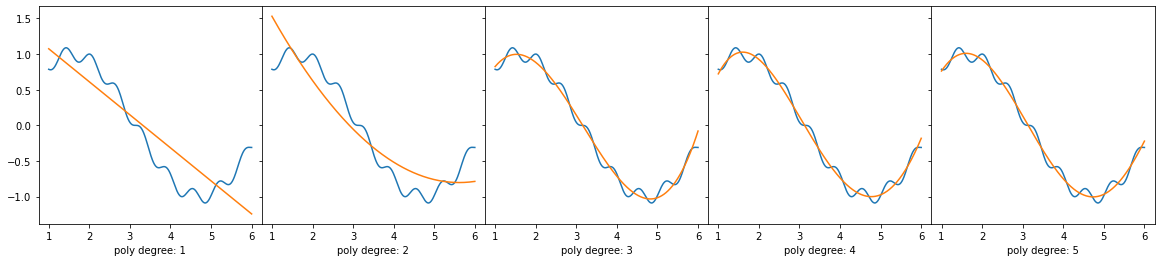

In [4]:
figure, axs = plt.subplots(1, len(poly_degrees), figsize=(20, 4), sharex=True, sharey=True)
figure.subplots_adjust(wspace=0, hspace=0)
for i in range(len(poly_degrees)):
    arg_table = np.linspace(left, right, 400)
    func_table = func_to_interpolate(arg_table)
    poly_table = polynomials[i](arg_table)
    axs[i].plot(arg_table, func_table, arg_table, poly_table)
for i in range(len(poly_degrees)):
    axs[i].set_xlabel(f'poly degree: {poly_degrees[i]}')

In [5]:
deltas = np.full(len(poly_degrees), None, dtype='float')
for i in range(len(poly_degrees)):
    quad_diff_integrated = quad(lambda x: (func_to_interpolate(x) - polynomials[i](x)) ** 2, left, right)[0]
    deltas[i] = math.sqrt(quad_diff_integrated / (right - left))
deltas.reshape(1, -1)

array([[0.34496778, 0.27815633, 0.07787945, 0.07011396, 0.0690748 ]])